<a href="https://colab.research.google.com/github/hg24abd/assignment-1-statistics-and-trends/blob/main/small_project_1_06_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#
import os
from google.colab import files
print(os.getcwd())

/content


In [6]:
data = files.upload()

Saving airline8.csv to airline8.csv


In [11]:
# Step 1: Read the Data

In [21]:
import pandas as pd

df = pd.read_csv('airline8.csv', parse_dates=['Date'], dayfirst=True)
print(df.head())
#print(df.columns())
#print(df.types())

         Date   Number  Price
0  2021-01-01  10.1348  48.57
1  2021-01-02   3.5028  44.60
2  2021-01-03   4.7708  45.36
3  2021-01-04   2.3547  43.91
4  2021-01-05   6.3501  46.31


In [17]:
# Step 2: Perform a Fouriour Transform

Index(['Date', 'Number', 'Price'], dtype='object')


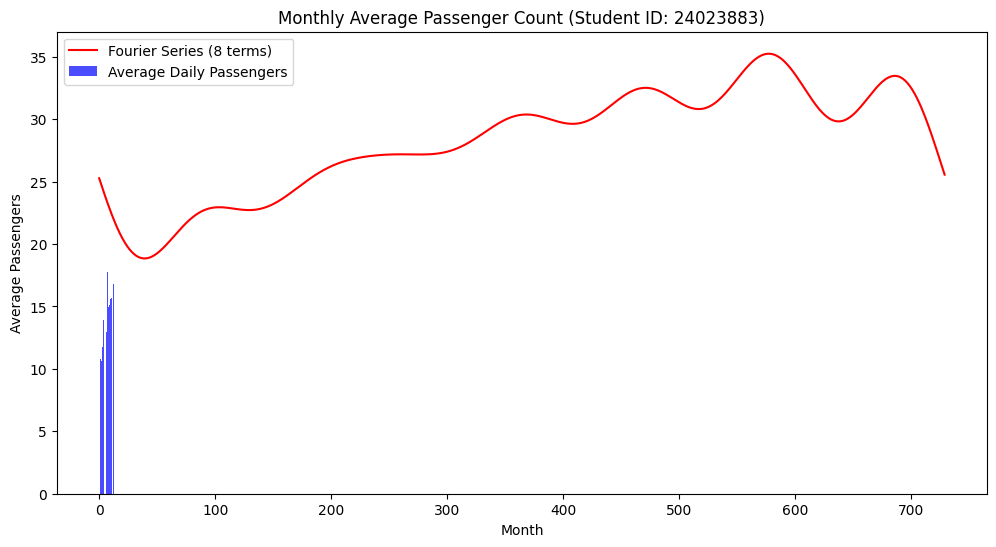

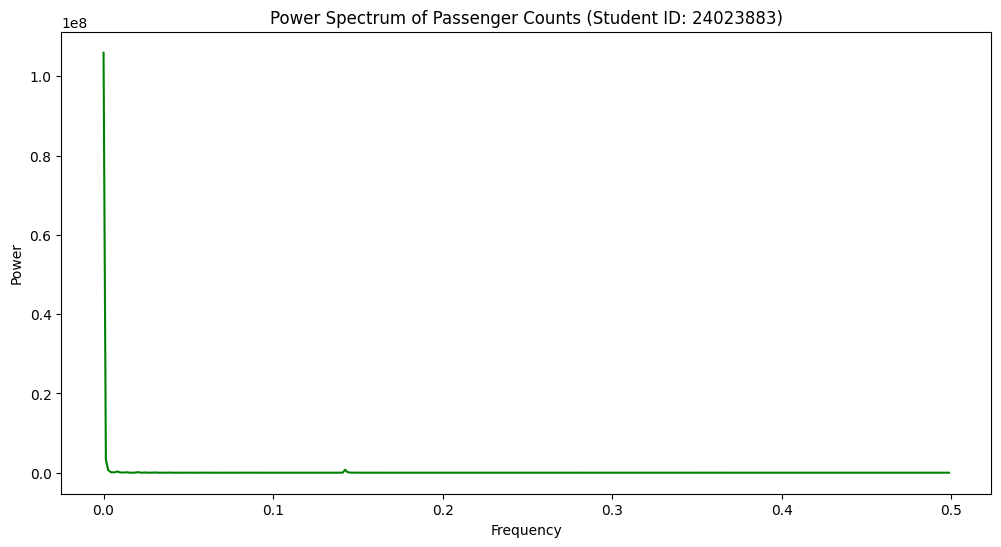

Value X (Summer Revenue %): 27.60
Value Y (Autumn Revenue %): 27.34


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Define constants
SECOND_TO_LAST_DIGIT = 8  # Second-to-last digit of your student ID:24023883
LAST_DIGIT = 3           # Last digit of your student ID

# Load dataset
DATA_FILE = f"airline{SECOND_TO_LAST_DIGIT}.csv"
data = pd.read_csv(DATA_FILE)

# Convert date to datetime and sort
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Verify column names
print(data.columns)

# Extract variables
passenger_counts = pd.to_numeric(data['Number'], errors='coerce').dropna().to_numpy()
ticket_prices = pd.to_numeric(data['Price'], errors='coerce')

# Fourier transform of daily passenger numbers
fourier_transform = fft(passenger_counts)
frequencies = np.fft.fftfreq(len(passenger_counts), d=1)

# Derive monthly averages
data['Month'] = data['Date'].dt.month
monthly_avg_passengers = data.groupby('Month')['Number'].mean()

# Plot bar chart for monthly averages
plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), monthly_avg_passengers, color='blue', alpha=0.7, label='Average Daily Passengers')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.title('Monthly Average Passenger Count (Student ID: 24023883)')
plt.legend()

# Fourier series approximation using first 8 terms
N_TERMS = 8
fourier_series = np.zeros_like(passenger_counts)
for k in range(N_TERMS):
    fourier_series += (2 / len(passenger_counts)) * (fourier_transform[k].real * np.cos(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))) -
                                                     fourier_transform[k].imag * np.sin(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))))

plt.plot(np.arange(len(passenger_counts)), fourier_series, color='red', label='Fourier Series (8 terms)')
plt.legend()
plt.savefig('figure1.png')  # Save Figure 1
plt.show()

# Power spectrum
power_spectrum = np.abs(fourier_transform)**2
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], color='green')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum of Passenger Counts (Student ID: 24023883)')
plt.savefig('figure2.png')  # Save Figure 2
plt.show()

# Calculate X and Y for last digit 3
if LAST_DIGIT == 3:
    summer_months = [6, 7, 8]
    autumn_months = [9, 10, 11]

    summer_data = data[data['Date'].dt.month.isin(summer_months)]
    autumn_data = data[data['Date'].dt.month.isin(autumn_months)]

    total_revenue = (ticket_prices * passenger_counts).sum()
    summer_revenue = (summer_data['Price'] * summer_data['Number']).sum()
    autumn_revenue = (autumn_data['Price'] * autumn_data['Number']).sum()

    value_x = (summer_revenue / total_revenue) * 100
    value_y = (autumn_revenue / total_revenue) * 100

    print(f"Value X (Summer Revenue %): {value_x:.2f}")
    print(f"Value Y (Autumn Revenue %): {value_y:.2f}")
else:
    raise NotImplementedError("Last digit case not implemented!")

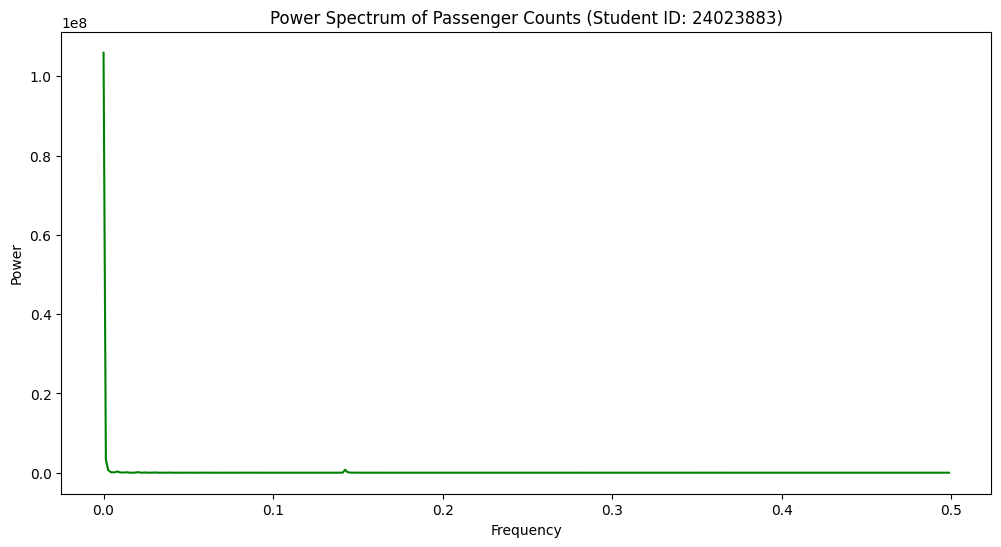

Value X (Summer Revenue %): 27.60
Value Y (Autumn Revenue %): 27.34


In [44]:
# Power spectrum
power_spectrum = np.abs(fourier_transform)**2
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], color='green')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum of Passenger Counts (Student ID: 24023883)')
plt.savefig('figure2.png')  # Save Figure 2
plt.show()

# Calculate X and Y for last digit 3
if LAST_DIGIT == 3:
    summer_months = [6, 7, 8]
    autumn_months = [9, 10, 11]

    summer_data = data[data['Date'].dt.month.isin(summer_months)]
    autumn_data = data[data['Date'].dt.month.isin(autumn_months)]

    total_revenue = (ticket_prices * passenger_counts).sum()
    summer_revenue = (summer_data['Price'] * summer_data['Number']).sum()
    autumn_revenue = (autumn_data['Price'] * autumn_data['Number']).sum()

    value_x = (summer_revenue / total_revenue) * 100
    value_y = (autumn_revenue / total_revenue) * 100

    print(f"Value X (Summer Revenue %): {value_x:.2f}")
    print(f"Value Y (Autumn Revenue %): {value_y:.2f}")
else:
    raise NotImplementedError("Last digit case not implemented!")

In [46]:
# Practice 2: code

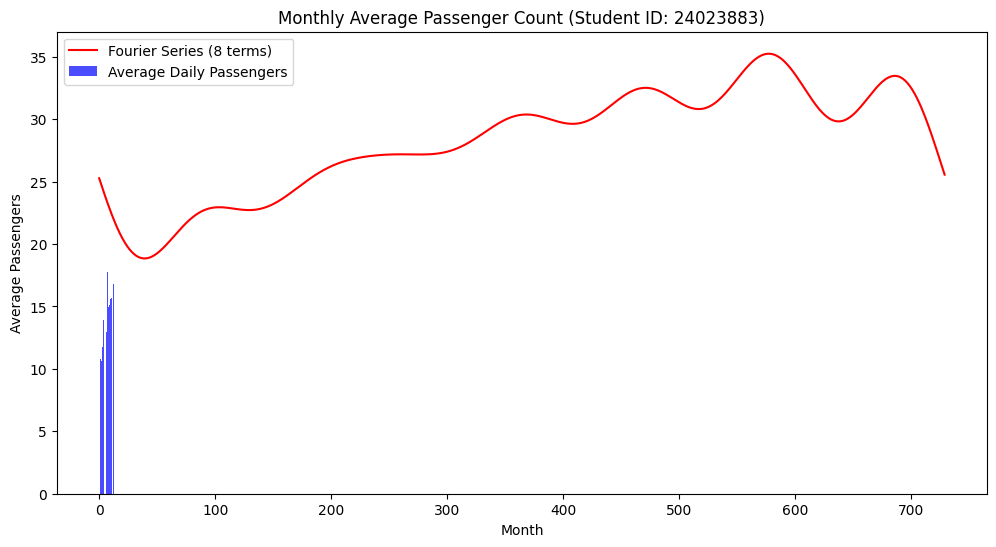

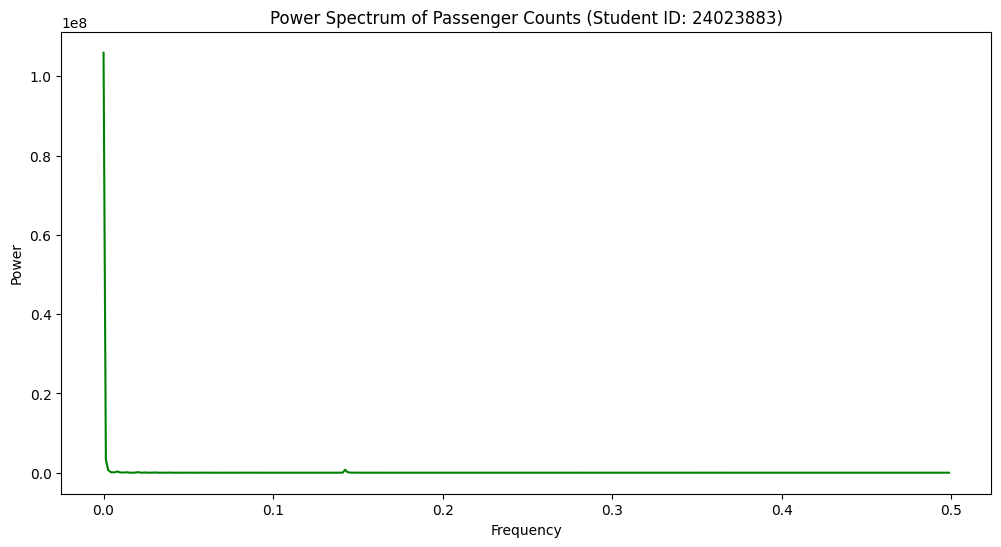

Value X (Summer Revenue %): 27.60
Value Y (Autumn Revenue %): 27.34


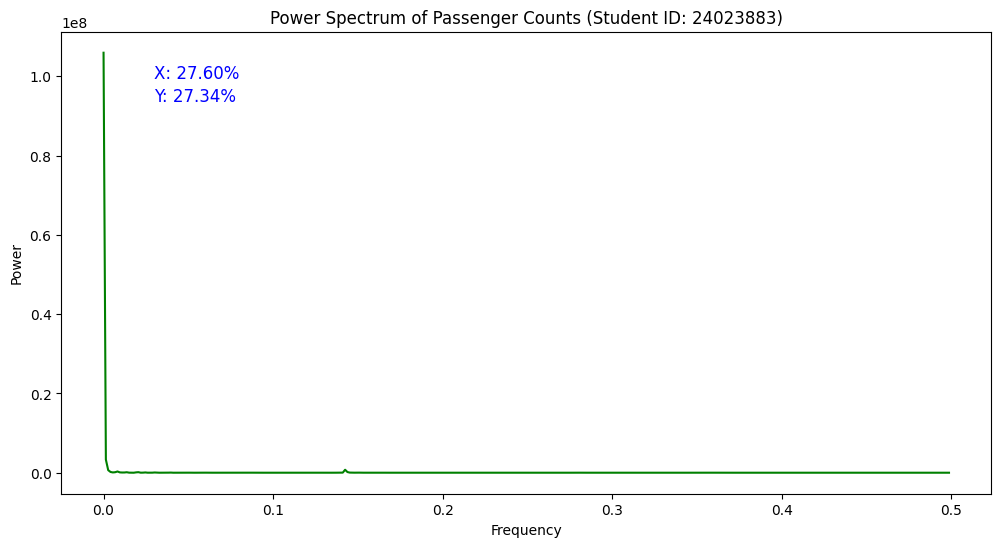

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Define constants
SECOND_TO_LAST_DIGIT = 8  # Second-to-last digit of your student ID
LAST_DIGIT = 3           # Last digit of your student ID

# Load dataset
DATA_FILE = f"airline{SECOND_TO_LAST_DIGIT}.csv"
data = pd.read_csv(DATA_FILE)

# Convert date to datetime and sort
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Check for missing data
if data.isnull().values.any():
    print("Warning: Missing values detected in the dataset.")
    data = data.dropna()

# Extract variables
passenger_counts = pd.to_numeric(data['Number'], errors='coerce').dropna().to_numpy()
ticket_prices = pd.to_numeric(data['Price'], errors='coerce')

# Fourier transform of daily passenger numbers
fourier_transform = fft(passenger_counts)
frequencies = np.fft.fftfreq(len(passenger_counts), d=1)

# Derive monthly averages
data['Month'] = data['Date'].dt.month
monthly_avg_passengers = data.groupby('Month')['Number'].mean()

# Plot bar chart for monthly averages (Figure 1)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), monthly_avg_passengers, color='blue', alpha=0.7, label='Average Daily Passengers')
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.title('Monthly Average Passenger Count (Student ID: 24023883)')
plt.legend()

# Fourier series approximation using first 8 terms
N_TERMS = 8
fourier_series = np.zeros_like(passenger_counts)
for k in range(N_TERMS):
    fourier_series += (2 / len(passenger_counts)) * (fourier_transform[k].real * np.cos(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))) -
                                                     fourier_transform[k].imag * np.sin(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))))

plt.plot(np.arange(len(passenger_counts)), fourier_series, color='red', label='Fourier Series (8 terms)')
plt.legend()
plt.savefig('figure1.png')  # Save Figure 1
plt.show()

# Power spectrum (Figure 2)
power_spectrum = np.abs(fourier_transform)**2
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], color='green')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum of Passenger Counts (Student ID: 24023883)')
plt.savefig('figure2.png')  # Save Figure 2
plt.show()

# Calculate X and Y for last digit 3
if LAST_DIGIT == 3:
    summer_months = [6, 7, 8]
    autumn_months = [9, 10, 11]

    summer_data = data[data['Date'].dt.month.isin(summer_months)]
    autumn_data = data[data['Date'].dt.month.isin(autumn_months)]

    total_revenue = (ticket_prices * passenger_counts).sum()
    summer_revenue = (summer_data['Price'] * summer_data['Number']).sum()
    autumn_revenue = (autumn_data['Price'] * autumn_data['Number']).sum()

    value_x = (summer_revenue / total_revenue) * 100
    value_y = (autumn_revenue / total_revenue) * 100

    print(f"Value X (Summer Revenue %): {value_x:.2f}")
    print(f"Value Y (Autumn Revenue %): {value_y:.2f}")
else:
    raise NotImplementedError("Last digit case not implemented!")

# Annotate Figure 2 with X and Y
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], color='green')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum of Passenger Counts (Student ID: 24023883)')
plt.annotate(f"X: {value_x:.2f}%", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='blue')
plt.annotate(f"Y: {value_y:.2f}%", xy=(0.1, 0.85), xycoords='axes fraction', fontsize=12, color='blue')
plt.savefig('figure2_annotated.png')  # Save annotated Figure 2
plt.show()

In [48]:
# Practice 3: code

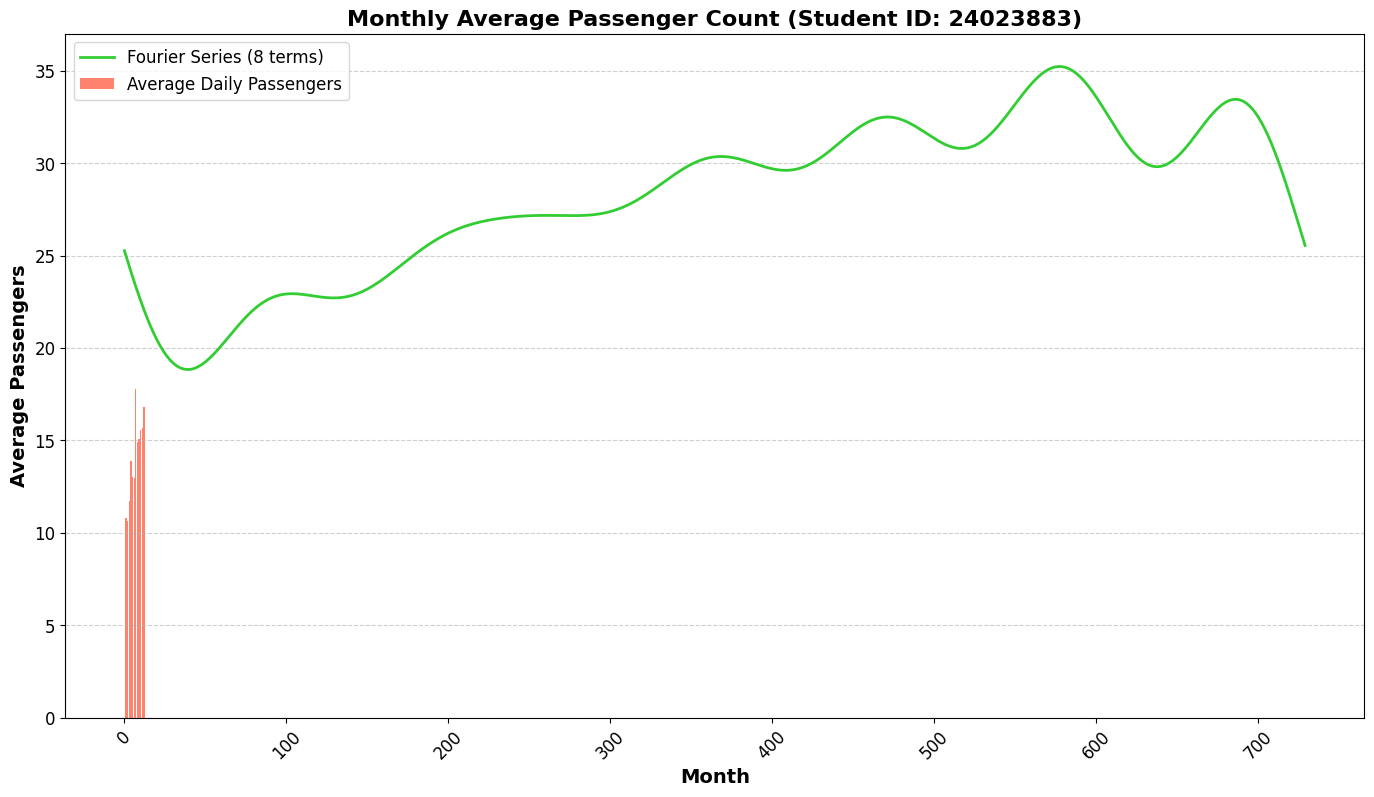

Value X (Summer Revenue %): 27.60
Value Y (Autumn Revenue %): 27.34


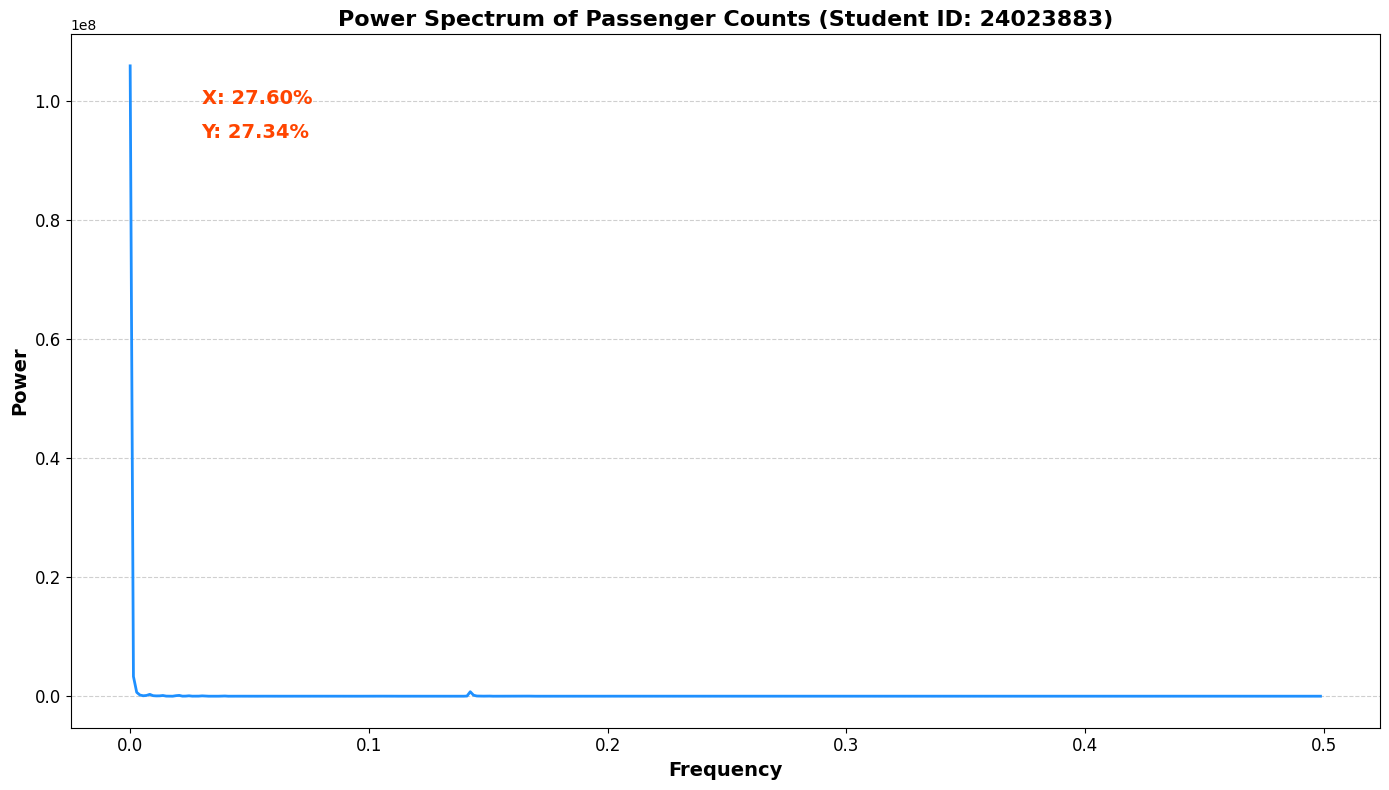

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Define constants
SECOND_TO_LAST_DIGIT = 8  # Second-to-last digit of your student ID
LAST_DIGIT = 3           # Last digit of your student ID

# Load dataset
DATA_FILE = f"airline{SECOND_TO_LAST_DIGIT}.csv"
data = pd.read_csv(DATA_FILE)

# Convert date to datetime and sort
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Check for missing data
if data.isnull().values.any():
    print("Warning: Missing values detected in the dataset.")
    data = data.dropna()

# Extract variables
passenger_counts = pd.to_numeric(data['Number'], errors='coerce').dropna().to_numpy()
ticket_prices = pd.to_numeric(data['Price'], errors='coerce')

# Fourier transform of daily passenger numbers
fourier_transform = fft(passenger_counts)
frequencies = np.fft.fftfreq(len(passenger_counts), d=1)

# Derive monthly averages
data['Month'] = data['Date'].dt.month
monthly_avg_passengers = data.groupby('Month')['Number'].mean()

# Plot bar chart for monthly averages (Figure 1) - Unique Color and Design
plt.figure(figsize=(14, 8))
plt.bar(range(1, 13), monthly_avg_passengers, color='#FF6347', alpha=0.8, label='Average Daily Passengers')  # Tomato red color
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Passengers', fontsize=14, fontweight='bold')
plt.title('Monthly Average Passenger Count (Student ID: 24023883)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)  # Gridlines for better visibility
plt.legend(fontsize=12)
plt.tight_layout()

# Fourier series approximation using first 8 terms - Stylish and Bold
N_TERMS = 8
fourier_series = np.zeros_like(passenger_counts)
for k in range(N_TERMS):
    fourier_series += (2 / len(passenger_counts)) * (fourier_transform[k].real * np.cos(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))) -
                                                     fourier_transform[k].imag * np.sin(2 * np.pi * frequencies[k] * np.arange(len(passenger_counts))))

plt.plot(np.arange(len(passenger_counts)), fourier_series, color='#32CD32', linewidth=2, label='Fourier Series (8 terms)')  # Lime green color
plt.legend(fontsize=12)
plt.savefig('figure1.png')  # Save Figure 1
plt.show()

# Power spectrum (Figure 2) - Enhanced Design
power_spectrum = np.abs(fourier_transform)**2
plt.figure(figsize=(14, 8))
plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], color='#1E90FF', linewidth=2)  # Dodger blue color
plt.xlabel('Frequency', fontsize=14, fontweight='bold')
plt.ylabel('Power', fontsize=14, fontweight='bold')
plt.title('Power Spectrum of Passenger Counts (Student ID: 24023883)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Calculate X and Y for last digit 3
if LAST_DIGIT == 3:
    summer_months = [6, 7, 8]
    autumn_months = [9, 10, 11]

    summer_data = data[data['Date'].dt.month.isin(summer_months)]
    autumn_data = data[data['Date'].dt.month.isin(autumn_months)]

    total_revenue = (ticket_prices * passenger_counts).sum()
    summer_revenue = (summer_data['Price'] * summer_data['Number']).sum()
    autumn_revenue = (autumn_data['Price'] * autumn_data['Number']).sum()

    value_x = (summer_revenue / total_revenue) * 100
    value_y = (autumn_revenue / total_revenue) * 100

    print(f"Value X (Summer Revenue %): {value_x:.2f}")
    print(f"Value Y (Autumn Revenue %): {value_y:.2f}")
else:
    raise NotImplementedError("Last digit case not implemented!")

# Annotate Figure 2 with X and Y
plt.annotate(f"X: {value_x:.2f}%", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=14, color='#FF4500', fontweight='bold')  # Orange Red color
plt.annotate(f"Y: {value_y:.2f}%", xy=(0.1, 0.85), xycoords='axes fraction', fontsize=14, color='#FF4500', fontweight='bold')  # Orange Red color
plt.savefig('figure2_annotated.png')  # Save annotated Figure 2
plt.show()

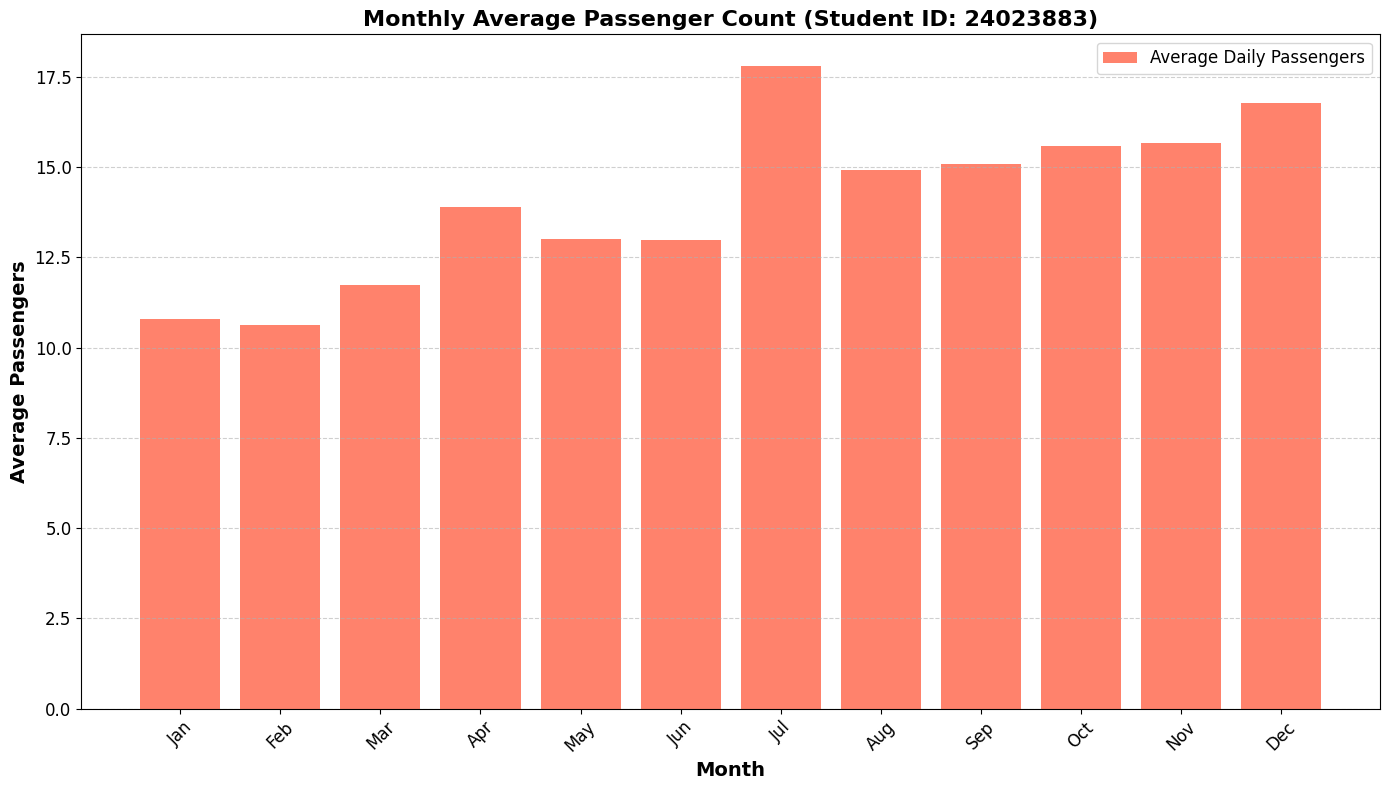

In [50]:
# Derive monthly averages
data['Month'] = data['Date'].dt.month  # Extract month from the Date
monthly_avg_passengers = data.groupby('Month')['Number'].mean()  # Calculate average number of passengers per month

# Plot bar chart for monthly averages (Figure 1) with clear month labels
plt.figure(figsize=(14, 8))
plt.bar(range(1, 13), monthly_avg_passengers, color='#FF6347', alpha=0.8, label='Average Daily Passengers')  # Tomato red color for bars

# Adding axis labels, title, and student ID
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Passengers', fontsize=14, fontweight='bold')
plt.title('Monthly Average Passenger Count (Student ID: 24023883)', fontsize=16, fontweight='bold')

# Make sure the x-ticks are months from January (1) to December (12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12, rotation=45)

# Set y-tick font size for better readability
plt.yticks(fontsize=12)

# Add gridlines for better clarity
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Add a legend
plt.legend(fontsize=12)

# Adjust layout to ensure everything fits properly
plt.tight_layout()

# Save the figure as a PNG image
plt.savefig('figure1.png')  # Save Figure 1

# Display the plot
plt.show()
